In [1]:
import bossdata
import fitsio
%pylab inline
import pandas as pd
import seaborn as sns
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
mirror = bossdata.remote.Manager()
temps = mirror.local_path('BOSS_templates')
Kingston = '/media/kenny/KINGSTON/'
fits_files = os.listdir(Kingston)[1:]

In [3]:
def make_QSOtable(table, Zall ,num=1000, Class = 'QSO   '):
    for n in range(num):
        x = n*134
        row = Zall[1]['PLATE','MJD','FIBERID','CLASS','THETA','ZWARNING'][x]
        if row['ZWARNING'][0] & 5 == 0 and row['CLASS'][0] == Class:
            table = np.concatenate((table,row))
        elif row['ZWARNING'][0] & 5 == 4:
            if row['CLASS'][0] == Class:
                row['CLASS'][0] = 'RCHI^2'
                table = np.concatenate((table,row))
            else:
                row2 = Zall[1]['PLATE','MJD','FIBERID','CLASS','THETA','ZWARNING'][x+1]
                if row2['CLASS'][0] == Class:
                    row['PLATE'][0] = row2['PLATE'][0]
                    row['MJD'][0] = row2['MJD'][0]
                    row['FIBERID'][0] = row2['FIBERID'][0]
                    row['THETA'][0] = row2['THETA'][0]
                    row['ZWARNING'][0] = row2['ZWARNING'][0]
                    table = np.concatenate((table,row))
    return table

In [4]:
QSOtable = np.array([],dtype = [('PLATE', '>i4'),('MJD', '>i4'),
                                ('FIBERID', '>i4'),('CLASS', 'S6'),
                                ('THETA', '>f4', (10,)),('ZWARNING', '>i4')])
GALtable = np.array([],dtype = [('PLATE', '>i4'),('MJD', '>i4'),
                                ('FIBERID', '>i4'),('CLASS', 'S6'),
                                ('THETA', '>f4', (10,)),('ZWARNING', '>i4')])

In [5]:
Z_all = fitsio.FITS(mirror.local_path('sas/dr12/boss/spectro/redux/v5_7_0/4650/v5_7_0/spZall-4650-55648.fits'))
QSOtable = make_QSOtable(QSOtable,Z_all)
GALtable = make_QSOtable(GALtable,Z_all, Class = 'GALAXY')
Z_all.close()

In [6]:
for file in fits_files:
    Z_all = fitsio.FITS(Kingston + file)
    QSOtable = make_QSOtable(QSOtable,Z_all)
    GALtable = make_QSOtable(GALtable,Z_all, Class = 'GALAXY')
    Z_all.close()

In [7]:
QSOtable.shape

(5658,)

In [8]:
np.unique(QSOtable['CLASS'])

array(['GALAXY', 'QSO   ', 'RCHI^2', 'STAR  '], 
      dtype='|S6')

In [9]:
for i in range(len(QSOtable)):
    t = QSOtable[i]['THETA']
    c = np.array([(t[0],t[1],t[2],t[3],QSOtable[i]['CLASS'])],
                 dtype = [('COEFF0','f4'),('COEFF1','f4'),('COEFF2','f4'),('COEFF3','f4'),('CLASS','|S6')])
    if i == 0:
        QSOCOEFFS = c
    else:
        QSOCOEFFS = np.concatenate((QSOCOEFFS,c))
for i in range(len(GALtable)):
    t = GALtable[i]['THETA']
    c = np.array([(t[0],t[1],t[2],t[3],GALtable[i]['CLASS'])],
                 dtype = [('COEFF0','f4'),('COEFF1','f4'),('COEFF2','f4'),('COEFF3','f4'),('CLASS','|S6')])
    if i == 0:
        GALCOEFFS = c
    else:
        GALCOEFFS = np.concatenate((GALCOEFFS,c))

In [12]:
QSOCOEFFS2 = QSOCOEFFS
QSOCOEFFS2['COEFF0'][:] = np.clip(QSOCOEFFS2['COEFF0'][:],-0.05,0.05)
QSOCOEFFS2['COEFF1'][:] = np.clip(QSOCOEFFS2['COEFF1'][:],-0.1,0.1)
QSOCOEFFS2['COEFF2'][:] = np.clip(QSOCOEFFS2['COEFF2'][:],-0.2,0.2)
QSOCOEFFS2['COEFF3'][:] = np.clip(QSOCOEFFS2['COEFF3'][:],-0.5,0.5)
GALCOEFFS2 = GALCOEFFS
GALCOEFFS2['COEFF3'][:] = np.clip(GALCOEFFS2['COEFF3'][:],-50,75)

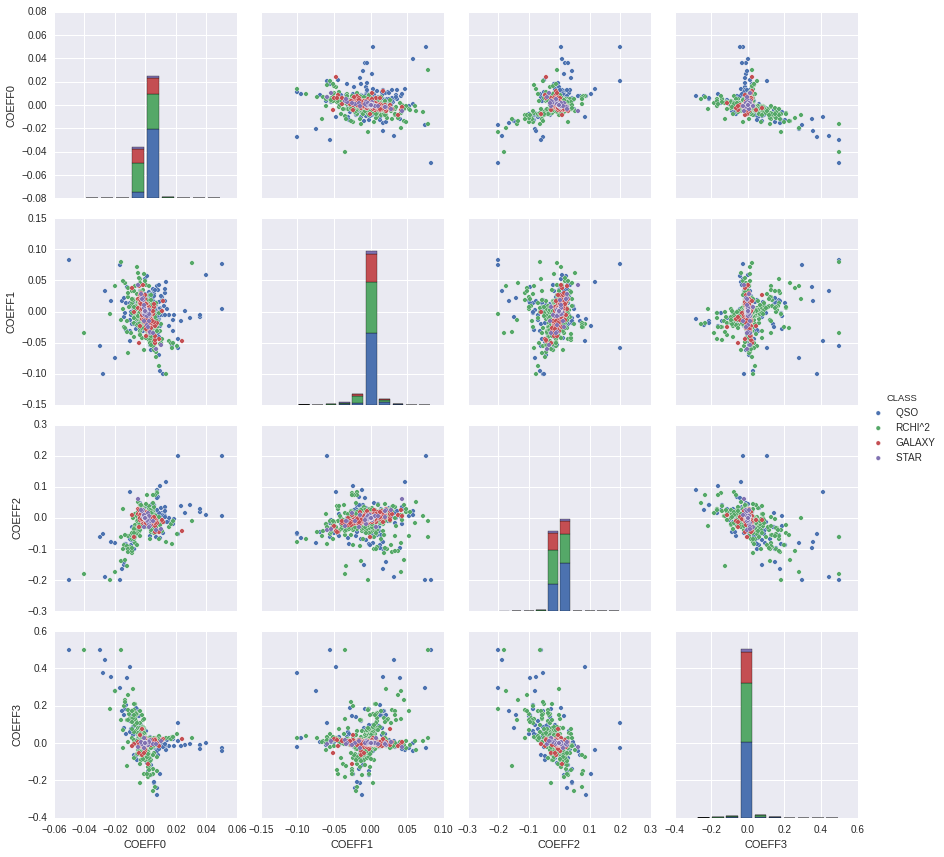

In [15]:
QSO_df = pd.DataFrame(QSOCOEFFS)
plt.figure()
sns.pairplot(QSO_df, hue = 'CLASS', size = 3)
plt.show()

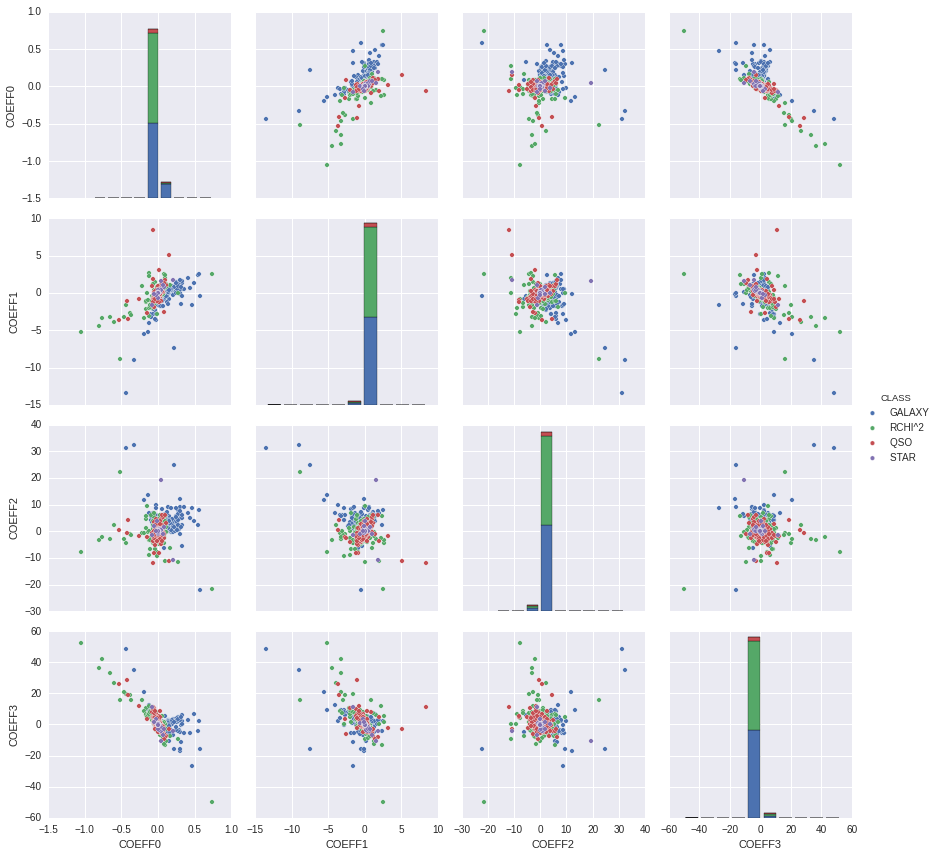

In [16]:
GAL_df = pd.DataFrame(GALCOEFFS)
plt.figure()
sns.pairplot(GAL_df, hue = 'CLASS', size = 3)
plt.show()

In [50]:
QSOtemp = fitsio.FITS(mirror.local_path('BOSS_templates/spEigenQSO-55732.fits'))

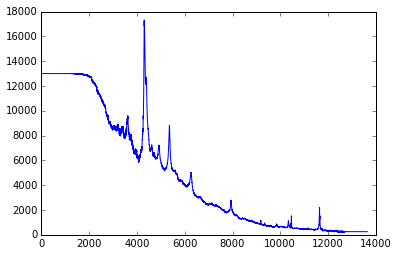

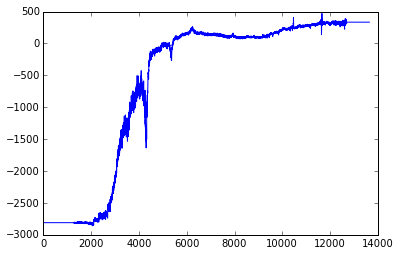

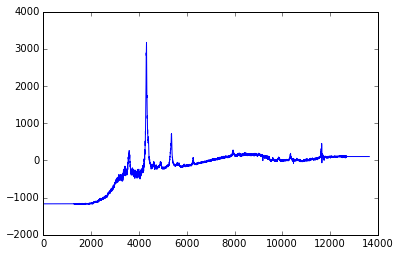

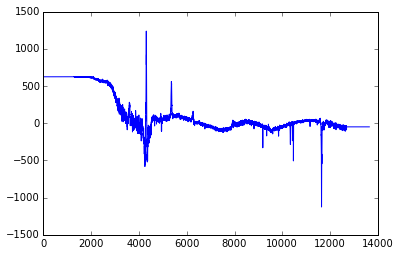

In [59]:
for i in range(4):
    plt.plot(QSOtemp[0][:,:][i])
    plt.show()